# NOTEBOOK 3 — Visualizations for Understanding

In [1]:
#from previous Notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("FC26_20250921.csv")
cols_needed = [
    "player_id",
    "short_name",
    "age",
    "nationality_name",
    "player_positions",
    "overall",
    "potential",
    "value_eur",
    "pace",
    "shooting",
    "passing",
    "dribbling",
    "defending",
    "physic"
]
df_no_gk = df[~df["player_positions"].str.contains("GK", na = False)]
df_filtered = df_no_gk[cols_needed]
df_filtered.head()
df_filtered.loc[:, "player_positions"] = (
    df_filtered["player_positions"]
    .str.split(",")
    .str[0]
    .str.strip()
)
df_filtered

/tmp/ipykernel_7716/632554218.py:6: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FC26_20250921.csv")


,player_id,short_name,age,nationality_name,player_positions,overall,potential,value_eur,pace,shooting,passing,dribbling,defending,physic
0,252371,J. Bellingham,22,England,CAM,90,94,174500000,80.0,86.0,83.0,90.0,78.0,85.0
1,239053,F. Valverde,26,Uruguay,CM,89,90,120500000,88.0,84.0,84.0,84.0,83.0,85.0
2,212622,J. Kimmich,30,Germany,CDM,89,89,86000000,72.0,74.0,89.0,84.0,83.0,79.0
3,235212,A. Hakimi,26,Morocco,RB,89,90,111000000,92.0,79.0,82.0,83.0,82.0,79.0
4,224232,N. Barella,28,Italy,CM,87,87,79500000,80.0,78.0,84.0,86.0,81.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16945,275651,Peng Xiao,19,China PR,CB,48,61,100000,53.0,27.0,28.0,29.0,48.0,57.0
16969,77910,Zhang Zhaozhi,21,China PR,CB,48,55,90000,60.0,21.0,25.0,32.0,48.0,58.0
17049,273641,Sun Guoliang,34,China PR,CB,51,51,20000,39.0,23.0,33.0,30.0,58.0,44.0
17060,274116,Jo Hyun Tae,20,Korea Republic,CB,49,61,110000,43.0,23.0,29.0,32.0,49.0,59.0


## **Visualizations for Exploration & Understanding**

### KDE Plot

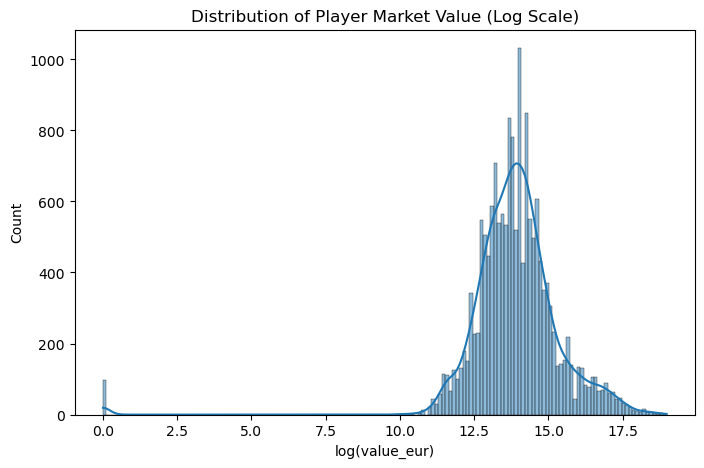

In [11]:
plt.figure(figsize = (8,5))
#creates & transforms KDE plot into a logarithmic scale for better understanding & comprehension
sns.histplot(np.log1p(df_filtered["value_eur"]), kde = True)
plt.title("Distribution of Player Market Value (Log Scale)")
plt.xlabel("log(value_eur)")
plt.show()

The KDE plot displays that the distribution of player's and their value is heavily right-skewed. This skew is exactly what is trying to be percieved and revealed by incorporating a log-scale visualization Majority of players are around e^14 which is around 1.2 million.

### Box Plot of Player Market Value

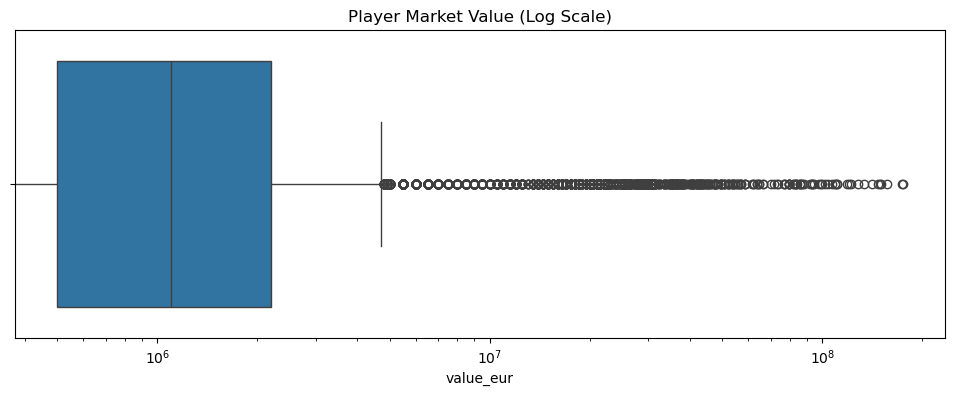

In [3]:
plt.figure(figsize = (12, 4))
sns.boxplot(x = df_filtered["value_eur"])
plt.xscale("log")
plt.title("Player Market Value (Log Scale)")
plt.show()

The following box plot clearly displays that a great number of players dominate the market value of soccer players, which can be seen by the upper-value outliers. Again, this box plot required a log scale due to the large range of different market values.

In [4]:
col = "value_eur" 

# finds first 25th percentile of value column
Q1 = df_filtered[col].quantile(0.25)
# finds first 75th percentile of value column
Q3 = df_filtered[col].quantile(0.75)
#f inds inter quartile range
IQR = Q3 - Q1

# calculates upper whisker
upper_whisker = Q3 + 1.5 * IQR
upper_whisker

#finds the number of upper outliers
num_upper_outliers = (df_filtered[col] > upper_whisker).sum()
num_upper_outliers

1925

There are 1,925 players whose market value's are upper outliers

### Histogram and Bar plot of Outliers

/tmp/ipykernel_7716/3419169394.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = outlier_per_country, x = "nationality_name", y = "count", palette = "Set2")


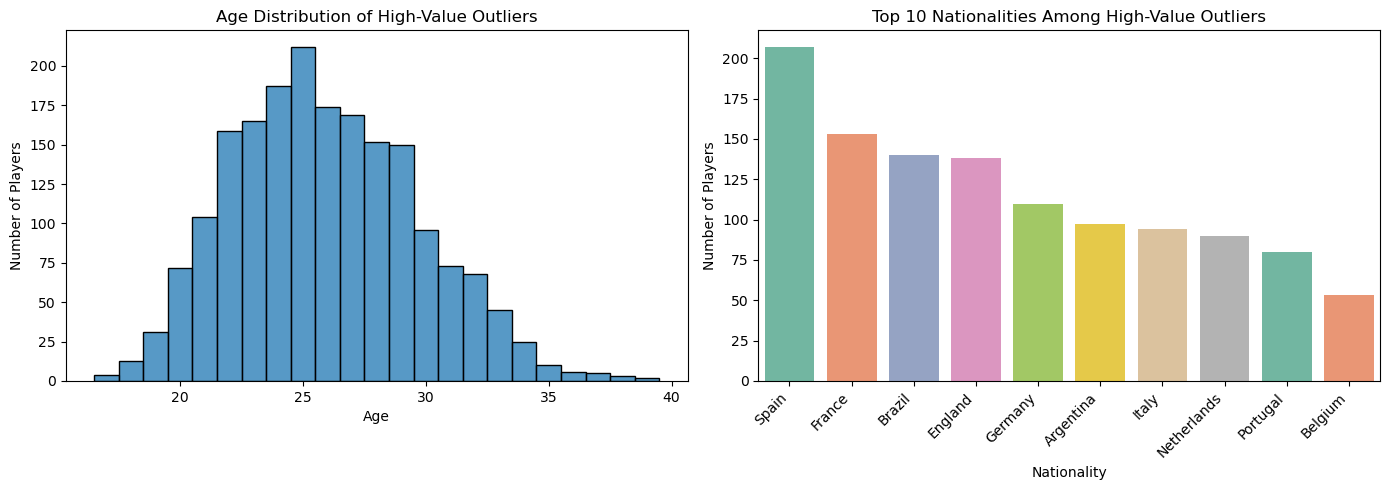

In [5]:
outliers = df_filtered[df_filtered[col] > upper_whisker]

#counts number of outliered players from the top 10 countries
outlier_per_country = (
    outliers["nationality_name"]
    .value_counts()
    .head(10)
    .reset_index()
)
outlier_per_country.columns = ["nationality_name", "count"]

plt.figure(figsize=(14, 5))

#age distribution of players who are outlier market values
plt.subplot(1, 2, 1)
sns.histplot(
    data = outliers,
    x = "age",
# +2 adds room for space on x axis fro readabiliity
    bins = range(int(outliers["age"].min()), int(outliers["age"].max()) + 2),
#makes each value its own bin
    discrete = True
)
plt.title("Age Distribution of High-Value Outliers")
plt.xlabel("Age")
plt.ylabel("Number of Players")


plt.subplot(1, 2, 2)
sns.barplot(data = outlier_per_country, x = "nationality_name", y = "count", palette = "Set2")
plt.title("Top 10 Nationalities Among High-Value Outliers")
plt.xlabel("Nationality")
plt.ylabel("Number of Players")
#rotated xticks by 45 for better readability and right edge is on the xtick
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()


The above visualization displays the distribution of ages of the players whose values are outliers, as well as the number of players from each country who have soccer players whose market values are outliers. As you can see, Spain has the most players whose market values are outliers.

In [6]:
outlier_per_country = (
    outliers["nationality_name"]
    .value_counts()
    .head(10)
    .rename_axis("nationality_name")
    .reset_index(name="outlier_count")
)

# makes a list of top 10 countries
top_countries = outlier_per_country["nationality_name"].tolist()

# total number of players from country
total_by_country = (
    df_filtered[df_filtered["nationality_name"].isin(top_countries)]
    ["nationality_name"]
    .value_counts()
    .rename("total_players")
)

# total number of player market value outlier from each country
outliers_by_country = (
    outliers[outliers["nationality_name"].isin(top_countries)]
    ["nationality_name"]
    .value_counts()
    .rename("outlier_count")
)

# adds ratio to dataframe
ratio_df = pd.concat([total_by_country, outliers_by_country], axis=1).fillna(0)

# computes the ratio
ratio_df["ratio"] = ratio_df["outlier_count"] / ratio_df["total_players"]

# sorts from highest ratio to lowest
ratio_df = ratio_df.sort_values(by="ratio", ascending=False)

# resets index to country and gives it a column
ratio_df = ratio_df.reset_index().rename(columns={"index": "country"})
ratio_df

,nationality_name,total_players,outlier_count,ratio
0,Portugal,315,80,0.253968
1,Netherlands,397,90,0.226700
2,Spain,930,207,0.222581
3,Brazil,642,140,0.218069
4,Belgium,263,53,0.201521
5,France,833,153,0.183673
6,Italy,558,94,0.168459
7,Germany,996,110,0.110442
8,England,1329,138,0.103837
9,Argentina,954,97,0.101677


While Spain had the most number of players whose market value is an outlier, Portugal, in comparison to the number of players that represent the country from the dataset, has more players whose market value is an outlier.

### Box Plot of In-game Attributes

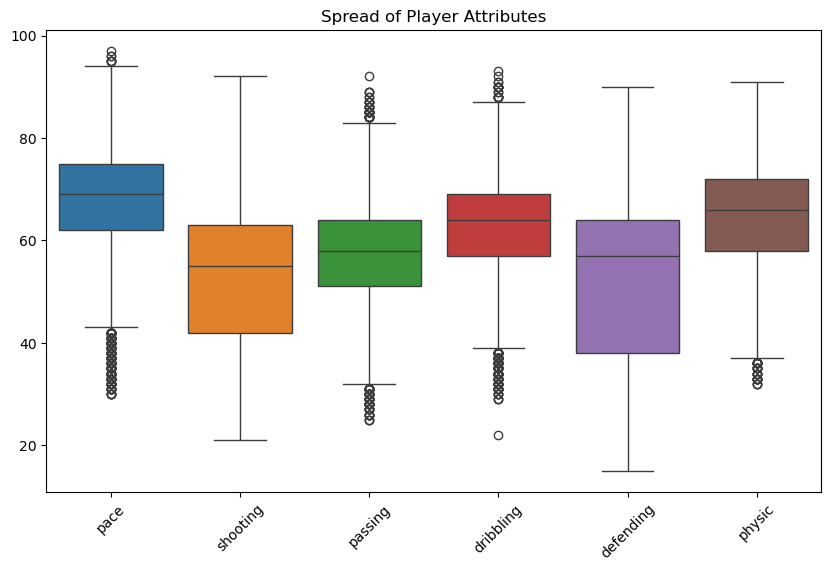

In [7]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df_filtered[["pace","shooting","passing","dribbling","defending","physic"]])
plt.title("Spread of Player Attributes")
#rotated xticks by 45 for readability
plt.xticks(rotation = 45)
plt.show()

In [8]:
#in-game attribute columns
attribute_cols = ["pace", "shooting", "passing", "dribbling", "defending", "physic"]

results = []

#computes quartiles and IQR
for col in attribute_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR
    
# average value
    avg_val = df_filtered[col].mean()
    
# number of outliers
    upper_outliers = (df_filtered[col] > upper_whisker).sum()
    lower_outliers = (df_filtered[col] < lower_whisker).sum()

# appends to results
    results.append({
        "attribute": col,
        "average": avg_val,
        "upper_outliers": upper_outliers,
        "lower_outliers": lower_outliers
    })

# change to dataframe
attribute_df = pd.DataFrame(results)

# sorts by high attribute average
attribute_df = attribute_df.sort_values(by = "average", ascending = False).reset_index(drop = True)
attribute_df

,attribute,average,upper_outliers,lower_outliers
0,pace,68.373922,8,324
1,physic,64.764303,0,41
2,dribbling,62.881356,21,206
3,passing,57.611944,48,82
4,shooting,52.810255,0,0
5,defending,51.952090,0,0


This box plot of each in-game attribute displays that there are no players who are extraordinarily good or bad at shooting or defending. There are a lot more players who are slower than faster, worse at dribbling than better, and worse at passing than better. On average, soccer players' strongest attribute is their pace compared to their other attributes.

### Box plot of distribution of player market value by position

/tmp/ipykernel_7716/2442815657.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


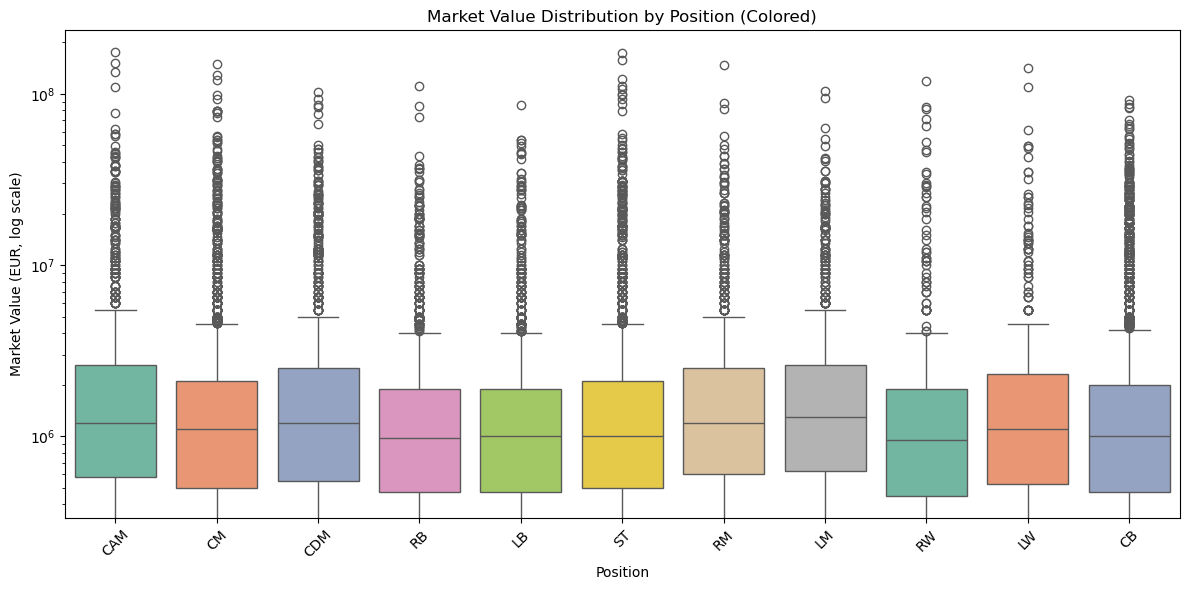

In [9]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df_filtered,
    x="player_positions",
    y="value_eur",
    palette="Set2"
)

plt.yscale("log")
plt.title("Market Value Distribution by Position (Colored)")
plt.xlabel("Position")
plt.ylabel("Market Value (EUR, log scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# market value column
col = "value_eur"   
positions = df_filtered["player_positions"].unique()

results = []

# iterates through each position
for pos in positions:
# creates dataframe if positions iterated is position in row iterated
    subset = df_filtered[df_filtered["player_positions"] == pos]
    
    Q1 = subset[col].quantile(0.25)
    Q3 = subset[col].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR

# finds average market value of market value in each positions
    average_value = subset[col].mean()
    upper_outliers = (subset[col] > upper_whisker).sum()
    lower_outliers = (subset[col] < lower_whisker).sum()
# counts total number of players in position in subset dataframe
    total_players = len(subset)
    
# adds ratio column if the total number of players is more than 0
    ratio = upper_outliers / total_players if total_players > 0 else 0
    
    results.append({
        "position": pos,
        "average_market_value": average_value,
        "upper_outliers": upper_outliers,
        "lower_outliers": lower_outliers,
        "total_players": total_players,
        "ratio_outliers_to_players": ratio
    })

# converts to DataFrame
position_df = pd.DataFrame(results)

# sorts by highest average market value
position_df = position_df.sort_values(by = "average_market_value", ascending = False).reset_index(drop = True)
position_df

,position,average_market_value,upper_outliers,lower_outliers,total_players,ratio_outliers_to_players
0,CAM,4.252924e+06,162,0,1137,0.142480
1,LW,4.044124e+06,61,0,394,0.154822
2,RW,3.641230e+06,54,0,435,0.124138
3,CDM,3.392383e+06,180,0,1433,0.125611
4,RM,3.334808e+06,131,0,1016,0.128937
5,LM,3.210395e+06,121,0,1064,0.113722
6,CM,3.114824e+06,262,0,2214,0.118338
7,ST,3.036973e+06,279,0,2534,0.110103
8,CB,2.726303e+06,378,0,3326,0.113650
9,LB,2.495717e+06,158,0,1367,0.115582


The CAM (center attacking midfield) position, on average, is the most expensive position. This makes sense as that is the position that most influences the attack, and attacking players in almost all sports are deemed as "the deciding factors". Furthermore, there are way more CBs (centerbacks) simply because most formations in soccer have two CBs, some even have three, which explains why there are more upper outliers. Lastly, most likely because there aren't as many LW (left wing) players, that position had the highest ratio of most players to market value outliers. There are no lower outliers for any position.